### Loading the dataset

In [1]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11501568/11490434 [==============================] - 2s 0us/step


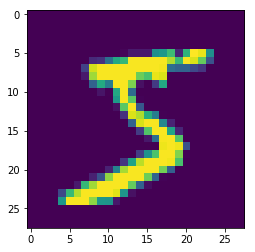

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
#plot the first image in the dataset
plt.imshow(X_train[0])

In [7]:
#check image shape
X_train[0].shape

(28, 28)

In [8]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [10]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Building the model

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import Convolution2D, MaxPooling2D

#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))

model.add(MaxPooling2D(pool_size=25))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

W0807 16:30:52.750921 4508362176 deprecation_wrapper.py:119] From /anaconda2/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



ValueError: Negative dimension size caused by subtracting 25 from 24 for 'max_pooling2d_1/MaxPool' (op: 'MaxPool') with input shapes: [?,24,24,32].

In [14]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0807 16:09:44.390069 4508362176 deprecation_wrapper.py:119] From /anaconda2/lib/python2.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0807 16:09:44.441807 4508362176 deprecation_wrapper.py:119] From /anaconda2/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [18]:
#train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 113s 2ms/step - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 2/3
60000/60000 [==============================] - 109s 2ms/step - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 3/3
60000/60000 [==============================] - 117s 2ms/step - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135


In [1]:
from sklearn.model_selection import learning_curve
from yellowbrick.model_selection import LearningCurve
#from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.classifier import ROCAUC

model3 = LearningCurve(model)
model3.fit(X, y)
model3.poof()

NameError: name 'model' is not defined

In [16]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)